In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

madrid = pd.read_csv("Madrid_database.csv",header=0)
print(madrid.head())

madrid['Date'] = pd.to_datetime(madrid['Date'])
print(madrid.dtypes)

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
0  08/09/2018            6        0           5        295.01    299.30   
1  09/09/2018            7        0           1        295.68    302.16   
2  10/09/2018            1        0           0        296.24    302.14   
3  11/09/2018            2        0           1        296.40    303.19   
4  12/09/2018            3        0           4        297.18    303.88   

   Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  ED_5  ED_6  \
0          2.56      3.96     101703.64              0.00281  ...  20.0  13.0   
1          1.26      3.03     101901.04              0.00012  ...  14.0  20.0   
2          2.44      3.57     102190.41              0.00014  ...  14.0  14.0   
3          2.36      3.57     102223.68              0.00139  ...  14.0  14.0   
4          1.39      2.95     102153.50              0.00001  ...  12.0  14.0   

   ED_7  Target_1  Target_2  Target_3  Target_4  Target_5  Tar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18100\10756355.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


In [27]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a variable called "madrid"
# madrid = pd.read_csv("your_dataset.csv")

# Separate features (X) and target variable (y)
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the standardized features

# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Day_of_week   Holiday  Moon_Phase  Average_Temp  Max_temp  Average_wind  \
0     0.999324 -0.198447   -1.270535      0.747634  0.486903     -0.041927   
1     1.499324 -0.198447   -1.383573      0.830516  0.803743     -1.188009   
2    -1.500677 -0.198447   -1.411833      0.899791  0.801527     -0.147719   
3    -1.000677 -0.198447   -1.383573      0.919584  0.917850     -0.218247   
4    -0.500677 -0.198447   -1.298794      1.016073  0.994290     -1.073401   

   Max_wind  Average_mslp  Total_precipitation  Holiday_prev      ED_1  \
0 -0.119362     -0.128986             0.446863     -0.198447 -1.594321   
1 -0.701847      0.183345            -0.342221     -0.198447 -1.594321   
2 -0.363630      0.641193            -0.336354     -0.198447 -1.394782   
3 -0.363630      0.693833             0.030320     -0.198447 -1.145358   
4 -0.751953      0.582793            -0.374488     -0.198447 -1.494551   

       ED_2      ED_3      ED_4      ED_5      ED_6      ED_7  
0 -1.492457 -1.490139 

In [28]:
from sklearn.model_selection import train_test_split

# Assuming your standardized dataset is stored in a variable called "X_scaled" and target variable in "y"
# X_scaled, y should be obtained after the previous preprocessing steps

# Determine the split index based on the temporal order (e.g., 70% train, 30% test)
split_index = int(0.7 * len(X_scaled))

# Split the data into training and testing sets
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the shapes of the training and testing sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (1034, 17) (1034, 7)
Testing set shapes: (444, 17) (444, 7)


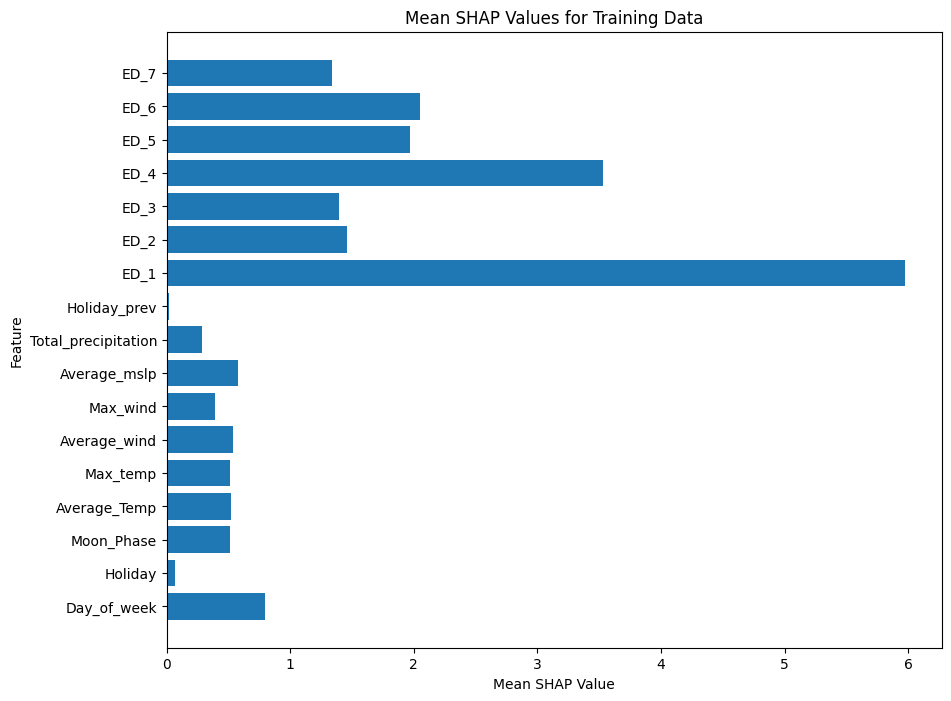

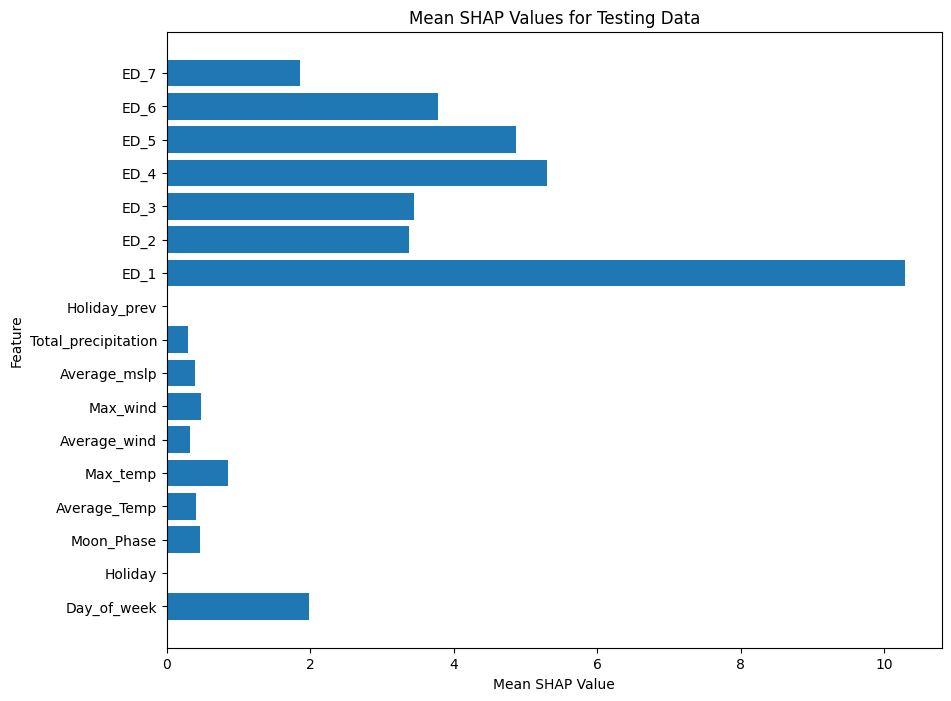

In [12]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP tree explainer
explainer = shap.TreeExplainer(model)

# Train SHAP values 
train_shap_values = explainer.shap_values(X_train)
# Test SHAP values 
test_shap_values = explainer.shap_values(X_test)

# Get feature names
feature_names = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1).columns

# Calculate mean SHAP values for training data
mean_train_shap_values = np.abs(train_shap_values).mean(axis=0)
# Flatten mean_train_shap_values
mean_train_shap_values_flat = mean_train_shap_values.flatten()

# Plot mean SHAP values for training data
plt.figure(figsize=(10, 8))
plt.barh(feature_names.repeat(7), mean_train_shap_values_flat)
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Mean SHAP Values for Training Data')
plt.show()

# Calculate mean SHAP values for testing data
mean_test_shap_values = np.abs(test_shap_values).mean(axis=0)
# Flatten mean_test_shap_values
mean_test_shap_values_flat = mean_test_shap_values.flatten()

# Plot mean SHAP values for testing data
plt.figure(figsize=(10, 8))
plt.barh(feature_names.repeat(7), mean_test_shap_values_flat)
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Mean SHAP Values for Testing Data')
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import lime
from lime.lime_tabular import LimeTabularExplainer

# Assuming your standardized dataset is stored in a variable called "X_scaled" and target variable in "y"
# X_scaled, y should be obtained after the previous preprocessing steps

# Train your regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create an instance of the LimeTabularExplainer class
lime_explainer = LimeTabularExplainer(training_data=X_train, feature_names=X.columns, class_names=None, mode='regression')

# Choose a specific data row from the test set for explanation
data_row = X_test[0]

# Obtain the explanation
explanation = lime_explainer.explain_instance(data_row=data_row, predict_fn=linear_model.predict, top_labels=7, num_features=len(X.columns))

# Display the explanation
explanation.show_in_notebook()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import lime
from lime.lime_tabular import LimeTabularExplainer

# Assuming your standardized dataset is stored in a variable called "X_scaled" and target variable in "y"
# X_scaled, y should be obtained after the previous preprocessing steps

# Train your decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Create an instance of the LimeTabularExplainer class
lime_explainer = LimeTabularExplainer(training_data=X_train, feature_names=X.columns, class_names=None, mode='regression')

# Choose a specific data row from the test set for explanation
data_row = X_test[0]

# Obtain the explanation
explanation = lime_explainer.explain_instance(data_row=data_row, predict_fn=tree_model.predict, top_labels=7, num_features=len(X.columns))

# Display the explanation
explanation.show_in_notebook()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17652\790381302.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


Mean Absolute Error (MAE): 6.994927606177606


 99%|===================| 2061/2072 [01:19<00:00]        

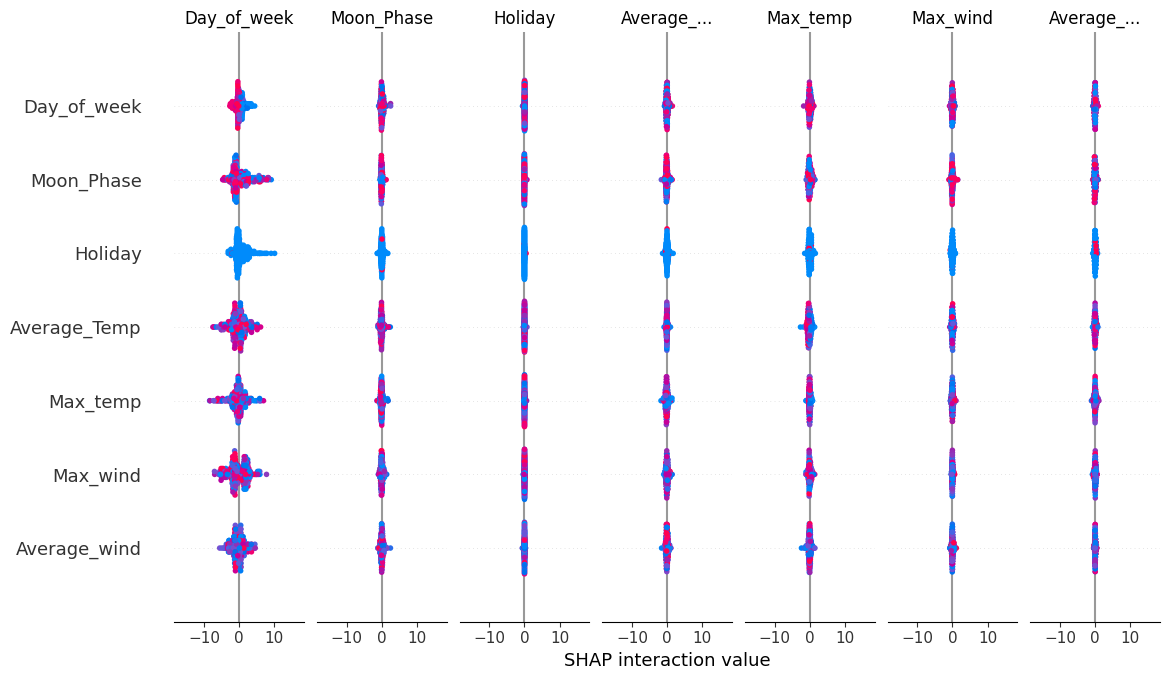

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# Load the dataset
madrid = pd.read_csv("Madrid_database.csv", header=0)

# Preprocess the data
madrid['Date'] = pd.to_datetime(madrid['Date'])

# Define features and target variable
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Mean Absolute Error (MAE):", mae)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="dot", show=False)
plt.show()


Mean Absolute Error (MAE): 7.093378378378378


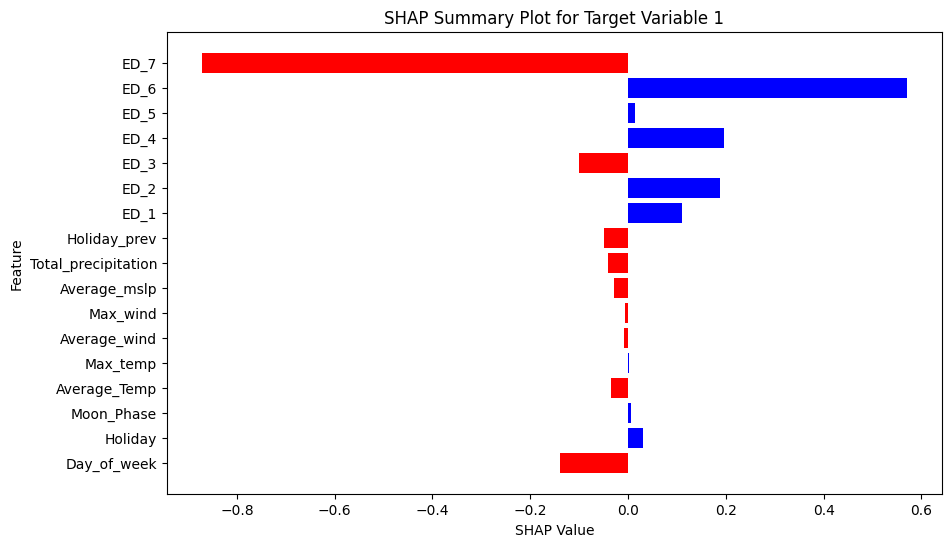

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Mean Absolute Error (MAE):", mae)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Reshape shap_values to make it a matrix even if it contains only one target variable
shap_values_reshaped = shap_values.reshape(-1, len(X.columns))

# Calculate the median SHAP value for each feature
shap_median = np.median(shap_values_reshaped, axis=0)

# Plot SHAP summary plot for the first target variable
plt.figure(figsize=(10, 6))
plt.barh(X.columns, shap_median, color=['blue' if val >= 0 else 'red' for val in shap_median])
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('SHAP Summary Plot for Target Variable 1')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17652\3869284640.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


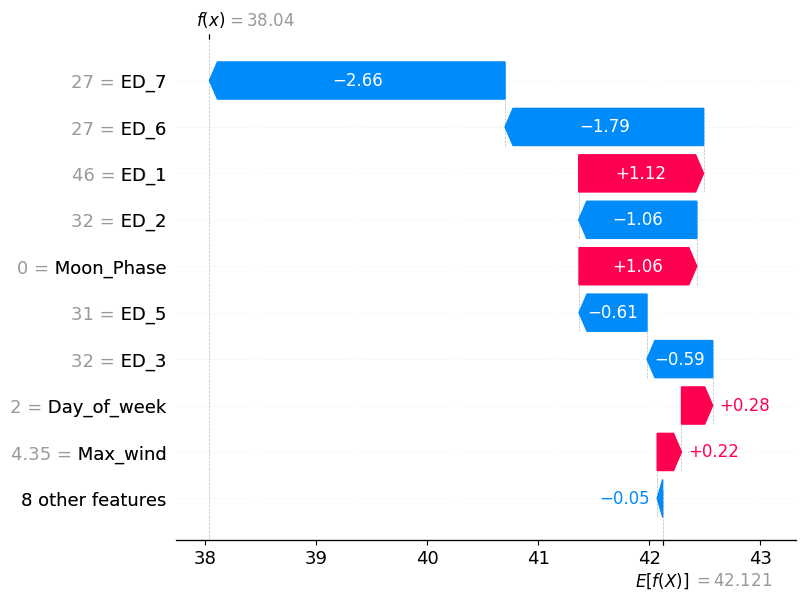

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Choose a specific observation to explain
idx = 42

# Generate a waterfall plot for the chosen observation
shap.waterfall_plot(shap.Explanation(values=shap_values[idx], base_values=explainer.expected_value, data=X_test.iloc[idx], feature_names=X.columns))


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Choose a specific observation to explain
idx = 42

# Generate a waterfall plot for the chosen observation
shap.waterfall_plot(shap.Explanation(values=shap_values[idx], base_values=explainer.expected_value, data=X_test.iloc[idx], feature_names=X.columns))


100%|===================| 3103/3108 [02:53<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 61.811801, while the model output was 62.410000. If this difference is acceptable you can set check_additivity=False to disable this check.

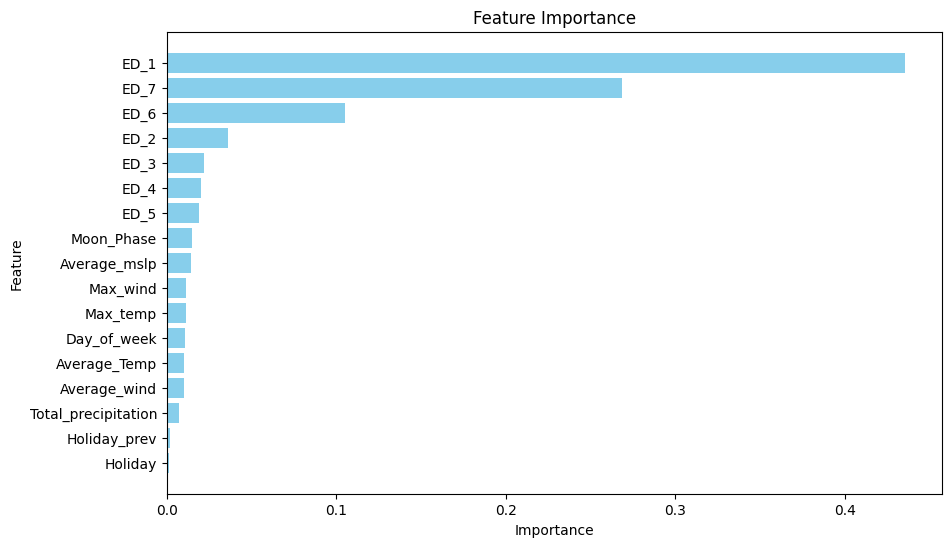

In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

100%|===================| 10338/10346 [06:41<00:00]        

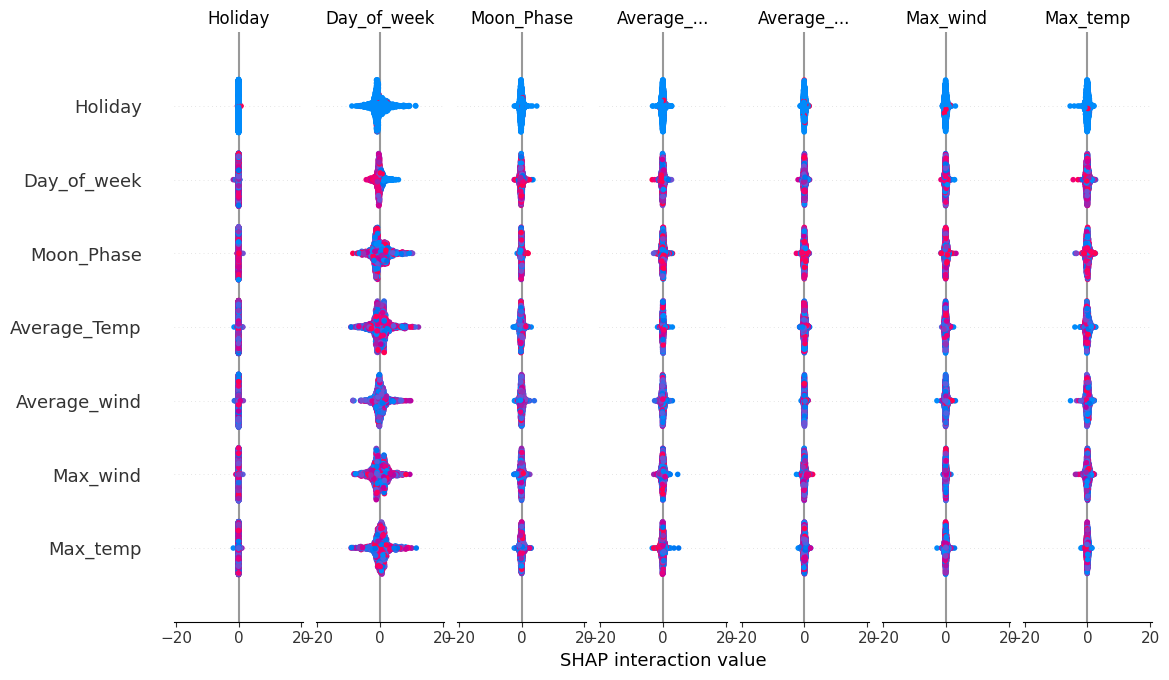

In [38]:
import shap

# Load the dataset
madrid = pd.read_csv("Madrid_database.csv", header=0)

# Extract features and target variable
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Train a model (random forest, for example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer.shap_values(X)

# Plot SHAP summary plot with feature names from the dataset
shap.summary_plot(shap_values, X, feature_names=X.columns)


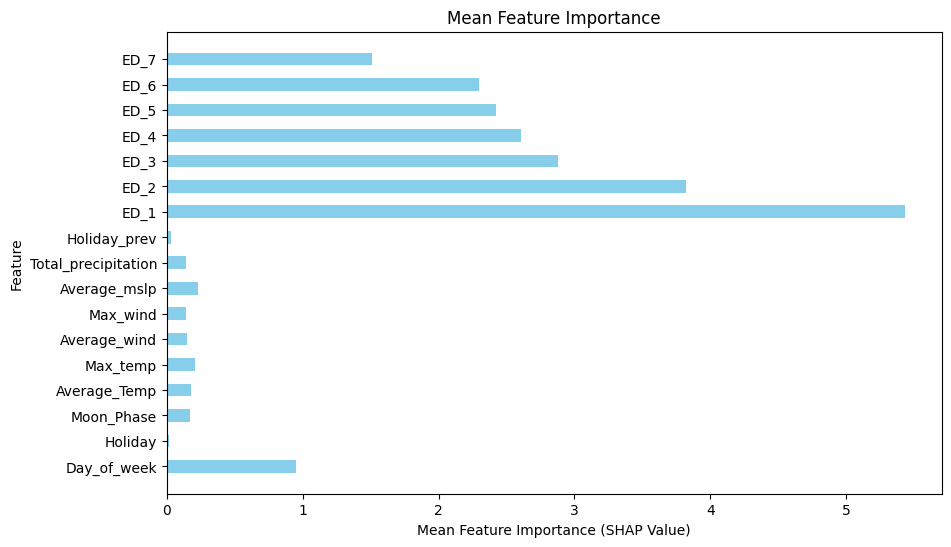

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor

# Flatten mean feature importance array
mean_feature_importance_flat = mean_feature_importance.flatten()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns.repeat(7), mean_feature_importance_flat, color='skyblue', height=0.5)
plt.xlabel('Mean Feature Importance (SHAP Value)')
plt.ylabel('Feature')
plt.title('Mean Feature Importance')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18100\2531260192.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


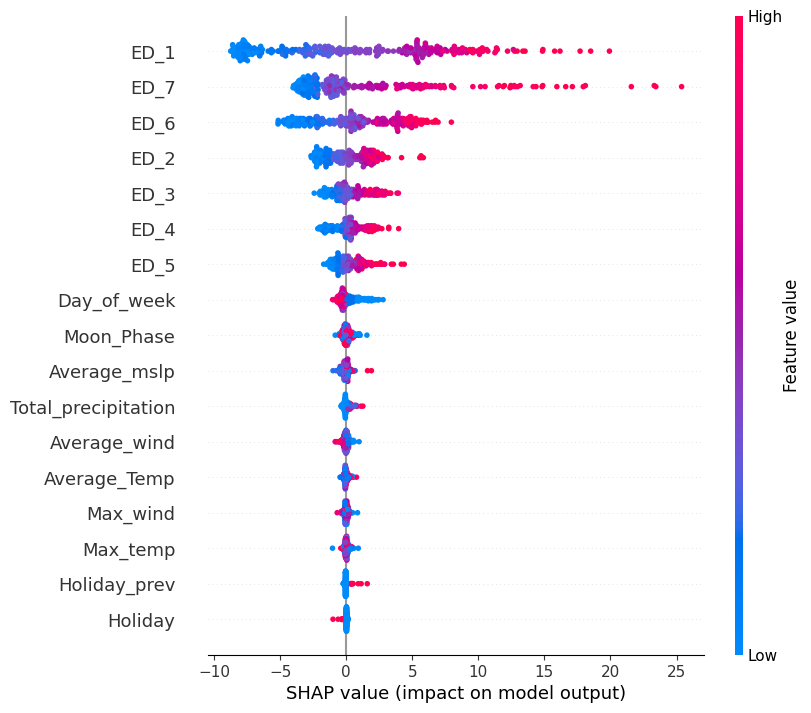

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Convert shap_values to Explanation object
shap_values_exp = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test, feature_names=X.columns)

# Generate a beeswarm plot
shap.plots.beeswarm(shap_values_exp, max_display=X.shape[1])
